#Question 1

AI không chỉ có ML & Deep Learning mà còn có rất nhiều chủ đề quan trọng khác. Ví dụ trong Venn diagram.
![alt text](https://i.imgur.com/9zT8vuz.png)

# Question 2

TEPFA = Khung chuẩn cho 1 mô hình Machine Learning, bao gồm:


*   **T-(Task)** nhiệm vụ mà máy tính phải thực hiện, cần xác định input $X$ và output $Y$ là gì.
*   **E-(Experience)** trải nghiệm mà ta cung cấp cho máy tính, ví dụ dữ liệu $D$ gồm các cặp $\{(x^t,y^t)\}_{t=1}^n$ mẫu.
*   **P-(Performance)** chuẩn đánh giá so sánh sự khác biệt giữa đầu ra $\hat{y}$ dự báo bởi AI và nhãn $y$, tính trên cả tập dữ liệu $D$.
*   **F-(Function Space)** Không gian hàm số mà máy tính phải tối ưu, ví dụ các hàm tuyến tính, các mô hình học sâu (deep learning)
*   **A-(Algorithm)** giải thuật để tìm ra hàm số tối ưu trong không gian hàm $F$, ví dụ sử dụng gradient.

TEPFA trong Linear Regression: xem thêm trong slides bài giảng session 2.

*   Task: Tính giá trị đầu ra là 1 số thực $y$ cho mỗi đầu vào $x$.
*   Experience: Tập dữ liệu X và nhãn Y
*   Performance: Dùng Mean Squared Error hoặc Mean Absolute Error để đánh giá sai số giữa (Y dự đoán) và (Y thực tế)
*   Function Space: Không gian hàm tuyến tính $\hat{y} = w^\top x +b$. Ta cần tìm bộ trọng số $(w,b)$ để sai số trên tập huấn luyện nhỏ nhất.
*   Algorithm: Gradient Descent




# Coding


Let 
$$y = 5x^3 + 3x^2 -2x + 10\times noise + 2$$

Generate a dataset using this function and fit a linear regression model on the generated dataset.
Visualize the training data and the trained model
Save the trained model and submit the file. You will need to search (Google) how to do this in sklearn.

**Note**: 
- ``x`` and ``noise`` must be generated from the standard normal distribution using ``np.random.rand``
- **Random Seed** and **Random State** must be set to ``42``

Tạo dataset theo hàm bậc 3 ở trên, tìm mô hình hồi quy tuyến tính tốt nhất cho dataset này, vẽ hình minh họa, rồi lưu mô hình thành file nộp.

In [ ]:
import numpy as np 
# for splitting data into train & test set
from sklearn.model_selection import train_test_split
# for creating Linear Regression model 
from sklearn.linear_model import LinearRegression 
# Metrics for evaluating model performance
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
# Draw chart
import matplotlib.pyplot as plt


In [ ]:
# Set random seed to make sure results are the same
np.random.seed(42)
# Random from the “standard normal” distribution
x = np.random.randn(4000,1)
# Random noise
noise = np.random.randn(4000,1)
y = 5 * (x**3) + 3 * (x**2) - 2 * x + 10 * noise + 2


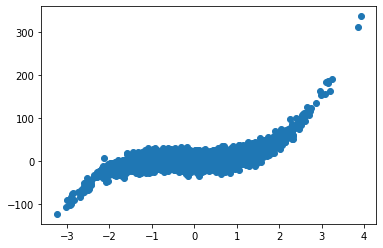

In [ ]:
plt.scatter(x,y) # Plot the whole dataset

**Train Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
print('Shape of x train',x_train.shape)
print('Shape of y train',y_train.shape)
print('Shape of x test',x_test.shape)
print('Shape of y test',y_test.shape)

Shape of x train (3200, 1)
Shape of y train (3200, 1)
Shape of x test (800, 1)
Shape of y test (800, 1)


**Define and Train Linear Regression Model**

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept and coefficients
print('Bias:',model.intercept_)
print('Weight:',model.coef_)

Bias: [4.66815921]
Weight: [[13.31146727]]


**Make a prediction**

In [ ]:
y_pred = model.predict(x_test)
print('Y predicted shape:', y_pred.shape)

Y predicted shape: (800, 1)


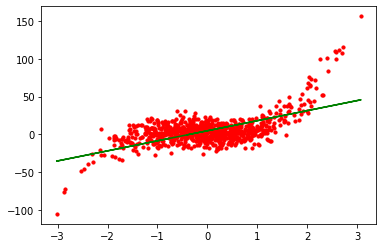

In [ ]:
# plot test set and trained model
plt.scatter(x_test, y_test, s=10, c='red') # plot x_test and y_testmake_friedman1
plt.plot(x_test, y_pred, c='green') # plot x_test and y_pred
plt.show()

In [ ]:
print('Mean Absolute Error on Test Set:', MAE(y_test, y_pred))
print('Mean Squared Error on Test Set:', MSE(y_test, y_pred))

Mean Absolute Error on Test Set: 11.711119296431775
Mean Squared Error on Test Set: 249.4077751778655


# Bonus: Non-Linear Model

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

Chú ý xem hình vẽ bên dưới khác hình vẽ bên trên như thế nào

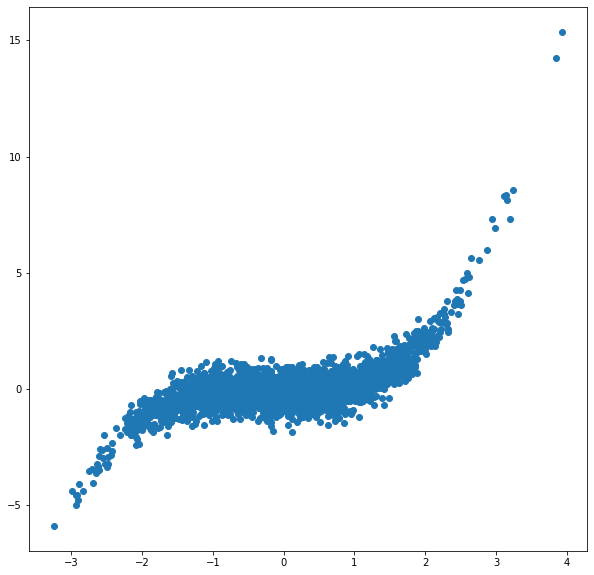

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x_train, y_train)

In [ ]:
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=x.shape[1:]))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.fit(x_train, y_train, epochs=200, verbose=0, batch_size=x_train.shape[0])

In [ ]:
model.evaluate(x_test,y_test, batch_size=x_test.shape[0])

1/1 [==============================] - 0s 2ms/step - loss: 0.2280 - mae: 0.3807


[0.22799964249134064, 0.3807425796985626]

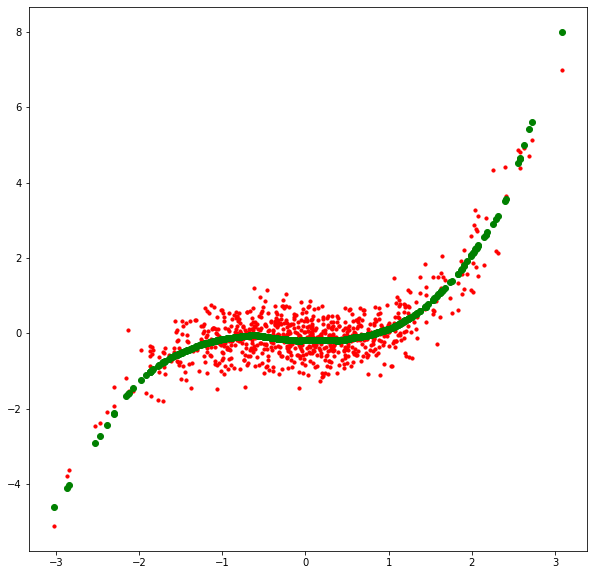

In [ ]:
y_pred = model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(x_test, y_test, s=10, c='red')
plt.scatter(x_test, y_pred, c='green')
plt.show()